# Gravitational Orbits

Created 4-22-19 by Lucas Nestor  
Revised 4-23-19 by Lucas Nestor

In this notebook we will solve the equations of motion for two bodys affected only by gravity. The energies are given by the following:

$\quad T = \frac{1}{2} m_1 (\dot x_1^2 + \dot y_1^2) + \frac{1}{2} m_2 (\dot x_2^2 + \dot y_2^2)$

$\quad U = -\frac{G m_1 m_2}{\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}}$

Solving the Lagrange equations yields the following:

$\quad m_1 \ddot x_1 = - \frac{G m_1 m_2 (x_1 - x_2)}{((x_1 - x_2)^2 + (y_1 - y_2)^2)^{3/2}}$

$\quad m_1 \ddot y_1 = - \frac{G m_1 m_2 (y_1 - y_2)}{((x_1 - x_2)^2 + (y_1 - y_2)^2)^{3/2}}$

$\quad m_2 \ddot x_2 = \frac{G m_1 m_2 (x_1 - x_2)}{((x_1 - x_2)^2 + (y_1 - y_2)^2)^{3/2}}$

$\quad m_2 \ddot y_2 = \frac{G m_1 m_2 (y_1 - y_2)}{((x_1 - x_2)^2 + (y_1 - y_2)^2)^{3/2}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [6]:
class Orbit():
    def __init__(self, m1=1, m2=1, G=1):
        self.m1 = m1
        self.m2 = m2
        self.G = G
    
    def r12(self, y):
        """
        Returns the relative distance between two particles.
        
        Parameters
        ==========
        y : float
            a vector with y[0] = x1, y[1] = y1, y[2] = x2, y[3] = y2
        """
        x1, y1, x2, y2 = y[0:4]
        return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    
    def dy_dt(self, t, y):
        """
        Returns the RHS of the d^2x/dt^2 and d^2y/dt^2 for masses 1 and 2.
        
        Parameters
        ==========
        t : float
            time
        y : float
            a vector with y[0] = x1, y[1] = y1, y[2] = x2, y[3] = y2
            y[4] = dx1/dt, y[5] = dy1/dt, y[6] = dx2/dt, and y[7] = dy2/dt
        """
        x1, y1, x2, y2 = y[0:4]
        
        dy_dt_vec = np.zeros(8)
        dy_dt_vec[0:4] = y[4:8]
        dy_dt_vec[4] = self.G * self.m2 * (x2 - x1) / self.r12(y)**3
        dy_dt_vec[5] = self.G * self.m2 * (y2 - y1) / self.r12(y)**3
        dy_dt_vec[6] = self.G * self.m1 * (x1 - x2) / self.r12(y)**3
        dy_dt_vec[7] = self.G * self.m1 * (y1 - y2) / self.r12(y)**3
        
        return dy_dt_vec
        
    def solve_ode(self, t_pts, initial_conditions, abserr=1.0e-10, relerr=1.0e-10):
        """
        Solves the motion for a given set of initial conditions.
        
        Parameters
        ==========
        t_pts : float
                time
        initial_conditions : float
                             array in the form of [x1, y1, x2, y2, x1_dot, y1_dot, x2_dot, y2_dot]
        abserr : float
                 absolute error threshold
        relerr : float
                relative error threshold
        """
        return solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), initial_conditions,
                         t_eval=t_pts, atol=abserr, rtol=relerr).y
        

# Various Orbits

Now we will implement and view various different orbits.

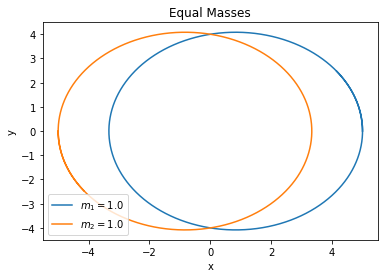

In [3]:
m1 = m2 = 1.

x1_0 = 5
x2_0 = -5

y1_0 = y2_0 = 0
x1_dot_0 = x2_dot_0 = 0

y1_dot_0 = .2
y2_dot_0 = -m1 / m2 * y1_dot_0

initial_conditions = [x1_0, y1_0, x2_0, y2_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0]

orbit = Orbit(m1=m1, m2=m2)

t_pts = np.arange(0, 120., 0.01)
x1, y1, x2, y2, _, _, _, _ = orbit.solve_ode(t_pts, initial_conditions)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x1, y1, label=rf'$m_1 = {m1:.1f}$')
ax.plot(x2, y2, label=rf'$m_2 = {m2:.1f}$')

ax.set_title('Equal Masses')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='lower left')

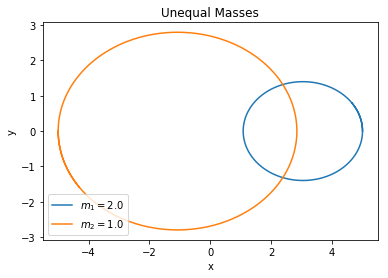

In [4]:
m1 = 2.
m2 = 1.

ratio = -m1 / m2

x1_0 = 5
x2_0 = -5

y1_0 = y2_0 = 0

x1_dot_0 = x2_dot_0 = 0

y1_dot_0 = .1
y2_dot_0 = ratio * y1_dot_0

initial_conditions = [x1_0, y1_0, x2_0, y2_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0]

orbit = Orbit(m1=m1, m2=m2)

t_pts = np.arange(0, 60., 0.01)
x1, y1, x2, y2, _, _, _, _ = orbit.solve_ode(t_pts, initial_conditions)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x1, y1, label=rf'$m_1 = {m1:.1f}$')
ax.plot(x2, y2, label=rf'$m_2 = {m2:.1f}$')

ax.set_title('Unequal Masses')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='lower left')

# Massive Object

In this section we will see what happens when one of the objects is massive compared to the other. We expect the massive object to not move as the light object orbits around it.

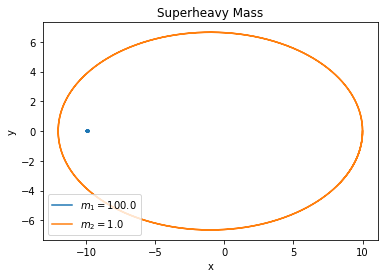

In [5]:
m1 = 100.
m2 = 1.

ratio = -m1 / m2

x1_0 = -10
x2_0 = 10

y1_0 = y2_0 = 0

x1_dot_0 = x2_dot_0 = 0

y1_dot_0 = .01
y2_dot_0 = ratio * y1_dot_0

initial_conditions = [x1_0, y1_0, x2_0, y2_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0]

orbit = Orbit(m1=m1, m2=m2)

t_pts = np.arange(0, 50., 0.01)
x1, y1, x2, y2, _, _, _, _ = orbit.solve_ode(t_pts, initial_conditions)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x1, y1, label=rf'$m_1 = {m1:.1f}$')
ax.plot(x2, y2, label=rf'$m_2 = {m2:.1f}$')

ax.set_title('Superheavy Mass')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='lower left')


Now we'll use the class for orbits we made in class and compare to above.

NOTE: The class below is not my own work. It is from the Orbit_games notebook.

In [8]:
class Orbit_Old:
    """
    Potentials and associated differential equations for central force motion
    with the potential U(r) = k r^n.
    """
    
    def __init__(self, ang_mom, n, k=1, mu=1):
        self.ang_mom = ang_mom
        self.n = n
        self.k = k
        self.mu = mu
    
    def U(self, r):
        """Potential energy of the form U = kr^n."""
        return self.k * r**self.n
    
    def Ucf(self, r):
        """Centrifugal potential energy"""
        return self.ang_mom**2 / (2. * self.mu * r**2)
    
    def Ueff(self, r):
        """Effective potential energy"""
        return self.U(r) + self.Ucf(r)
    
    def U_deriv(self, r):
        """dU/dr"""
        return self.n * self.k * r**(self.n - 1)
        
    def Ucf_deriv(self, r):
        """dU_cf/dr"""
        return -2. * self.ang_mom**2 / (2. * self.mu * r**3)
        
    def Ueff_deriv(self, r):
        """dU_eff/dr"""
        return self.U_deriv(r) + self.Ucf_deriv(r)
        
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dr/dt d^2r/dt^2 dphi/dt]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            3-component vector with y[0] = r(t), y[1] = dr/dt, y[2] = dphi/dt
            
        """
        return [ y[1], 
                -1./self.mu * self.Ueff_deriv(y[0]), 
                self.ang_mom / (self.mu * y[0]**2) ]
    
    
    def solve_ode(self, t_pts, r_0, r_dot_0, phi_0, 
                  abserr=1.0e-8, relerr=1.0e-8):
        """
        Solve the ODE given initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [r_0, r_dot_0, phi_0]  
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        r, r_dot, phi = solution.y
        return r, r_dot, phi
    
    def energy(self, t_pts, r, r_dot):
        """Evaluate the energy as a function of time"""
        return (self.mu/2.) * r_dot**2 + self.Ueff(r)
        

In [45]:
# Constants used in both orbits
m1 = 100.
m2 = 1.
G = 1.
t_pts = np.arange(0, 50., 0.01)

# First (Lagrangian) Orbit
ratio = -m1 / m2

x1_0 = -10
x2_0 = 10
y1_0 = y2_0 = x1_dot_0 = x2_dot_0 = 0
y1_dot_0 = .01
y2_dot_0 = ratio * y1_dot_0
initial_conditions = [x1_0, y1_0, x2_0, y2_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0]

o1 = Orbit(m1=m1, m2=m2, G=G)

x1, y1, x2, y2, _, _, _, _ = o1.solve_ode(t_pts, initial_conditions)

# Second (Old) Orbit
n = -1
k = -G * m1 * m2
ang_mom = np.abs(m1 * y1_dot_0 * x1_0) + np.abs(m2 * y2_dot_0 * x2_0)
mu = m1 * m2 / (m1 + m2)

o2 = Orbit_Old(ang_mom, n=n, k=k, mu=mu)

r_0 = 20
r_dot_0 = 0.
phi_0 = 0.0
r_pts, _, phi_pts = o2.solve_ode(t_pts, r_0, r_dot_0, phi_0)


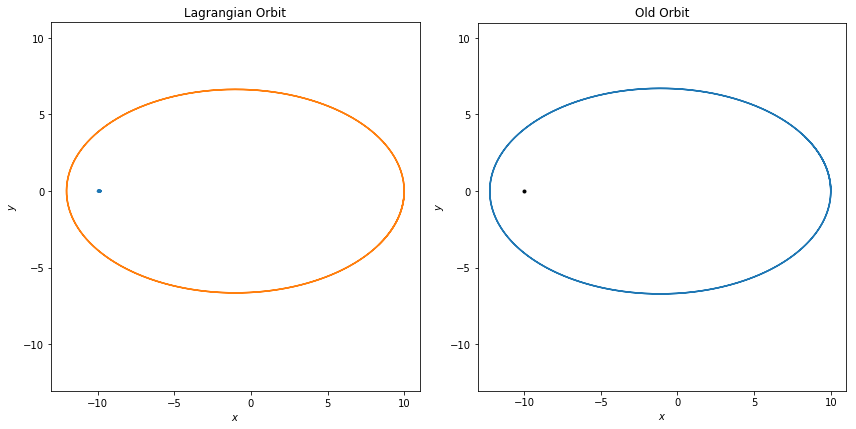

In [69]:
fig = plt.figure(figsize=(12,6))

lower_lim = min(x2) - 1
upper_lim = max(x2) + 1
ax1 = fig.add_subplot(1,2,1)
ax1.plot(x1, y1)
ax1.plot(x2, y2)
ax1.set_title('Lagrangian Orbit')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.set_xlim(lower_lim, upper_lim)
ax1.set_ylim(lower_lim, upper_lim)
ax1.set_aspect(1)

ax2 = fig.add_subplot(1,2,2)
ax2.plot(x1_0, y1_0, 'o', color='k', markersize=3)
ax2.plot(r_pts*np.cos(phi_pts) - 10, r_pts*np.sin(phi_pts))
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')
ax2.set_xlim(lower_lim, upper_lim)
ax2.set_ylim(lower_lim, upper_lim)
ax2.set_aspect(1)
ax2.set_title('Old Orbit')

fig.tight_layout()

As you can see, the orbits are the same. I shifted the old orbit over to convert the relative distance between the masses to the absolute position of the lighter mass.